## Application: Exploring Hand-written Digits

### Unsupervised learning:

In [ ]:
#To begin, we will import the essential packages-
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

Load the digit dataset from sklearn and create an object out of it. Additionally, we can get the total number of rows and the total number of columns in this dataset by doing the following:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

1797: Represents the number of samples (or images) in the digits dataset. This means you have 1797 handwritten digit images.
64: Represents the number of features (or pixels) in each sample. Each image is an 8x8 pixel grayscale image, and 8 * 8 = 64.
In essence, your dataset contains 1797 images of handwritten digits, each flattened into a 64-dimensional vector where each element represents the grayscale intensity of a pixel.

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

kmeans = KMeans(n_clusters=10, random_state=0):

This line initializes a K-Means clustering algorithm.
n_clusters=10: Specifies that you want to group the data into 10 clusters (assuming your handwritten digits are 0-9).
random_state=0: Sets a seed for the random number generator to ensure reproducibility of the results.
clusters = kmeans.fit_predict(digits.data):

kmeans.fit_predict(): This does two things:
Fit: It trains the K-Means model on your digits.data (the 8x8 pixel representations of the digits). During training, the algorithm iteratively adjusts the centers of the clusters to minimize the distance between each data point and its assigned cluster center.
Predict: Once the model is trained, it assigns each data point in digits.data to one of the 10 clusters. The results (cluster labels) are stored in the clusters variable.
kmeans.cluster_centers_.shape:

kmeans.cluster_centers_: This attribute stores the final coordinates of the cluster centers found by the K-Means algorithm. These are the "average" or "representative" points for each of the 10 clusters.
.shape: This method is used to get the dimensions of the cluster_centers_ array.


The output above indicates that K-means generated 10 clusters with 64 features

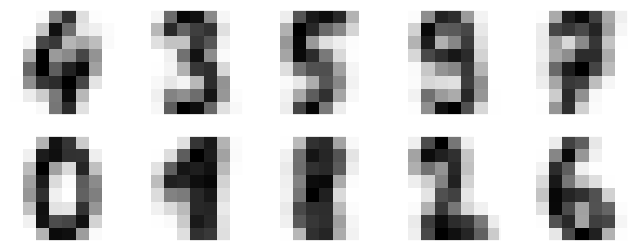

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
#centers = kmeans.cluster_centers_.reshape(6, 8, 8)
for axi, center in zip(ax.flat, centers):
   axi.set(xticks=[], yticks=[])
   axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
#For another number other than 10

kmeans = KMeans(n_clusters=8, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(8, 64)

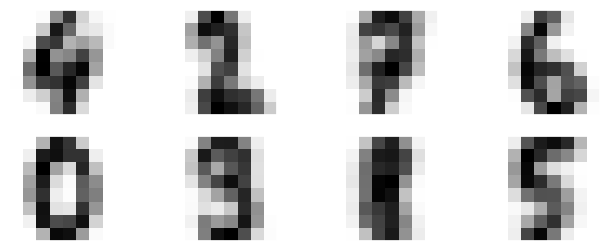

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(8, 8, 8)
#centers = kmeans.cluster_centers_.reshape(6, 8, 8)
for axi, center in zip(ax.flat, centers):
   axi.set(xticks=[], yticks=[])
   axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

As a result, we will receive the picture below, which shows clusters centers learned by k-means.

### Supervised learning

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = load_digits()

# Prepare the data and labels
X = digits.images.reshape((len(digits.images), -1))  # Flatten the images
y = digits.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)



X_train shape: (1437, 64)
X_test shape: (360, 64)
y_train shape: (1437,)
y_test shape: (360,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_model,y_test)

0.8472222222222222

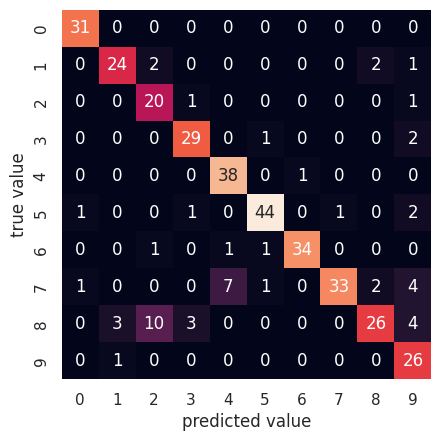

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_model,y_test)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

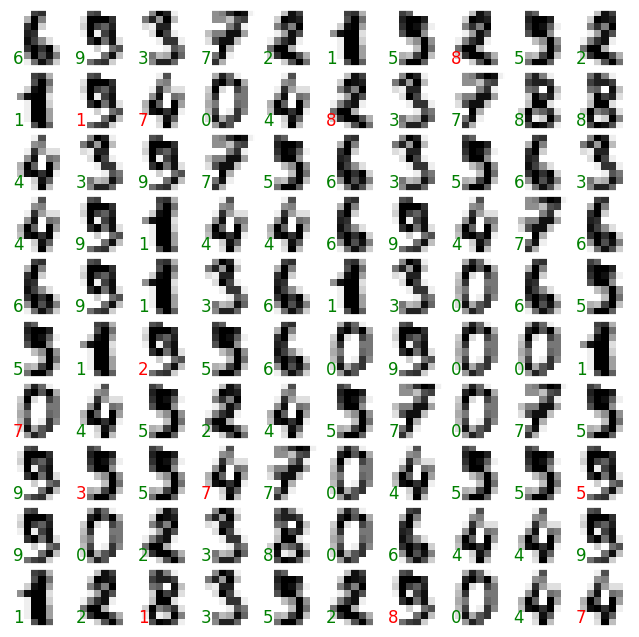

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# Reshape the original digits data (not the PCA transformed data)
test_images = digits.images[y_test]

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_model[i]) else 'red')
plt.show()

### Unsupervised learning: Dimensionality reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space.
Instead we'll reduce the dimensions to 2, using an unsupervised method.
Here, we'll make use of a manifold learning algorithm called *Isomap* (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)), and transform the data to two dimensions:

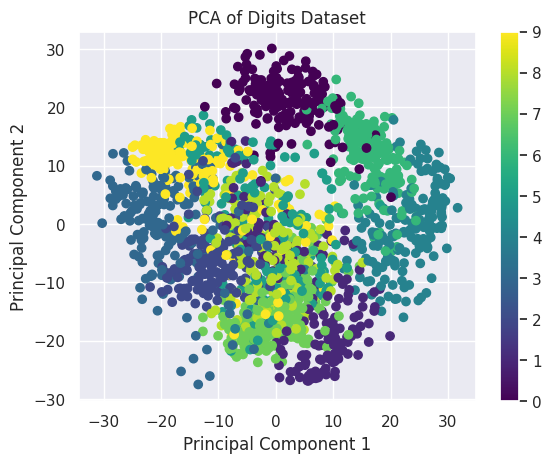

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Initialize PCA to reduce dimensions to 2
pca = PCA(n_components=2)

# Fit and transform the data
digits_pca = pca.fit_transform(digits.data)

# Visualize the results
plt.scatter(digits_pca[:, 0], digits_pca[:, 1], c=digits.target, cmap="viridis")
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Digits Dataset')
plt.show()


Load the data: We load the digits dataset as you did previously.
Initialize PCA: We create a PCA object and specify that we want to keep only the first two principal components (n_components=2).
Fit and transform:
pca.fit(digits.data) learns the principal components that best explain the variance in the original data.
pca.transform(digits.data) projects the original data onto these two principal components, effectively reducing the dimensionality from 64 to 2. The results are stored in digits_pca.
Visualize: We create a scatter plot where:
The x-axis represents the values of the first principal component.
The y-axis represents the values of the second principal component.
Each point is colored based on its true digit label (0-9) to see how the digits cluster together in the reduced space.
Key Points:

PCA is a powerful dimensionality reduction technique that can help you visualize high-dimensional data.
By reducing the dimensions to 2, you can easily plot the data and potentially see patterns or clusters that were not obvious in the original 64-dimensional space.
Keep in mind that PCA is a linear transformation, and it might not always be the best choice for all datasets. If your data has non-linear relationships, other dimensionality reduction techniques might be more suitable.
It is possible to visualize the 64 dimensions using the PCA and the 64 components of the image matrix. However, it is not very useful since you can't visualize 64 components. If you use PCA to reduce the dimensions of the data it's not guaranteed that the digits would be distinguishable from one another since you are losing information by reducing the dimensionality of the data.